In [14]:
#Data was sourced from Forbes list of Billioniares, 2020. #The top 50 on the list was chosen, with corresponding 7 attributes #Attributes #Name #Gender: 2 main genders were sourced for; male and female #Age:
# a probability for an individual to amass wealth based on their education, family background, career path, gender and age

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [16]:
list =pd.read_csv('./forbes_list.csv')
list.head()

,name,gender,age,country,career industry,highest level of education,self-made score,net worth
0,Jeff Bezos,male,56,usa,technology,Bachelor of Arts/Science,8,113000000000
1,Bill Gates,male,64,usa,technology,Drop Out,8,98000000000
2,Bernard Arnault & Family,male,71,france,fashion & retail,Bachelor of Arts/Science,5,76000000000
3,Warren Buffet,male,89,usa,finance & investments,Master of Science,8,67500000000
4,Larry Ellison,male,75,usa,technology,Drop Out,9,59000000000


In [17]:
list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   name                        50 non-null     object
 1   gender                      50 non-null     object
 2   age                         50 non-null     int64 
 3   country                     50 non-null     object
 4   career industry             50 non-null     object
 5   highest level of education  50 non-null     object
 6   self-made score             50 non-null     int64 
 7   net worth                   50 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 3.2+ KB


In [18]:
# getting unique values for object-type columns, except name, self-madescore and net worth
list['highest level of education'].unique()

array(['Bachelor of Arts/Science', 'Drop Out', 'Master of Science',
       'Doctor of Jurisprudence', 'Master of Business Administration',
       'Bachelor of Science in Engineering', 'Master of Arts',
       'Doctorate'], dtype=object)

In [19]:
list.gender.unique()

array(['male', 'female'], dtype=object)

In [20]:
list.country.unique()

array(['usa', 'france', 'spain', 'mexico', 'china', 'india', 'germany',
       'canada', 'hong kong', 'italy', 'brazil', 'russia', 'japan'],
      dtype=object)

In [21]:
list['career industry'].unique()

array(['technology', 'fashion & retail', 'finance & investments',
       'telecom', 'media &entertainment', 'diversified', 'energy',
       'real estate', 'gambling & casinos', 'food & beverage',
       'automative', 'manufacturing', 'metals & mining'], dtype=object)

In [22]:
#calculating the mean of net worth per eductaion level
group = list.groupby(['highest level of education']).mean()
worth_education= group.reset_index()
worth_education

,highest level of education,age,self-made score,net worth
0,Bachelor of Arts/Science,64.769231,5.038462,3.723462e+10
1,Bachelor of Science in Engineering,62.000000,4.000000,3.680000e+10
2,Doctor of Jurisprudence,75.000000,4.000000,5.410000e+10
3,Doctorate,72.000000,8.500000,1.985000e+10
4,Drop Out,71.000000,7.090909,3.542727e+10
5,Master of Arts,62.000000,2.000000,3.160000e+10
6,Master of Business Administration,71.000000,8.250000,2.850000e+10
7,Master of Science,66.500000,7.500000,5.142500e+10


<function matplotlib.pyplot.show(close=None, block=None)>

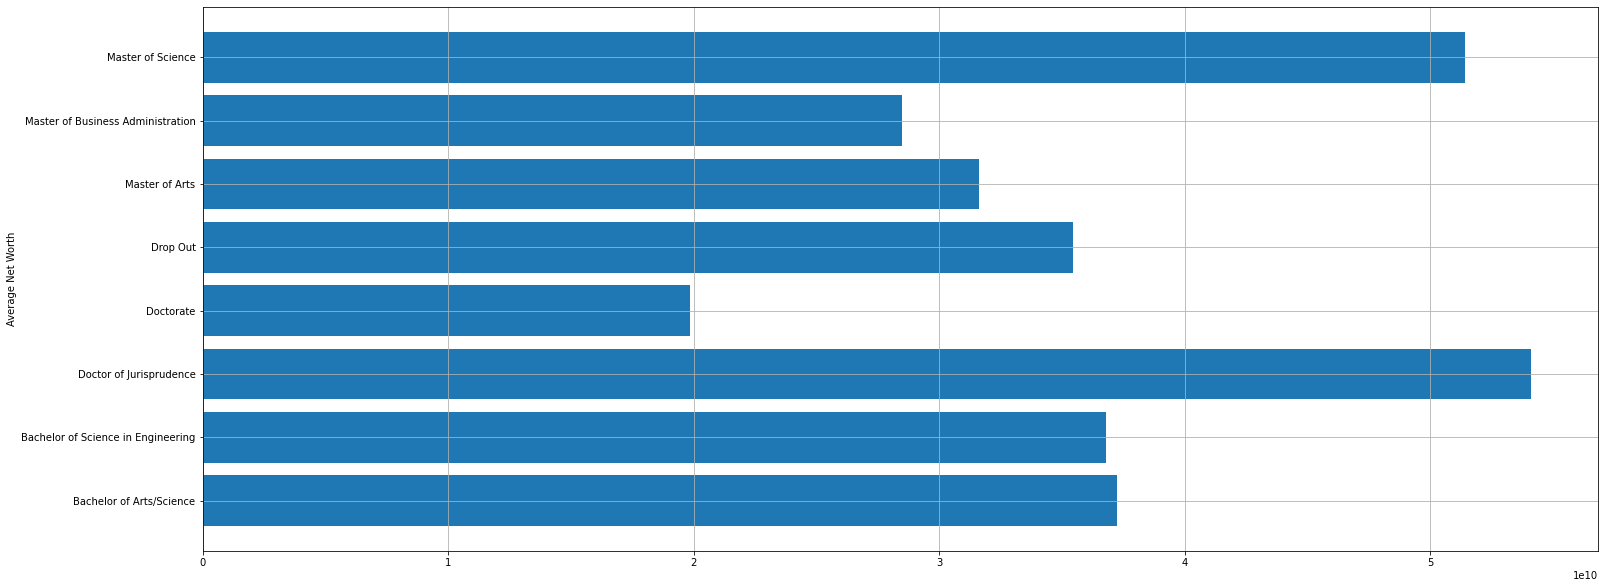

In [116]:
#visualizing how level of eductaion impacts net worth
fig, ax = plt.subplots(figsize=(25, 10))
plt.barh(worth_education['highest level of education'], worth_education ['net worth'])
plt.ylabel('Average Net Worth')
ax.grid()
plt.show



In [33]:
#converting education level variable to dummy variables
#dropping the first dummy variable to avoid dependency on among variables
edu_dummies = pd.get_dummies(data=list['highest level of education'], drop_first=True)
edu_dummies.head()

,Bachelor of Science in Engineering,Doctor of Jurisprudence,Doctorate,Drop Out,Master of Arts,Master of Business Administration,Master of Science
0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0


In [34]:
#building a linear regression model to predict net worth using the dummy variables
regr = LinearRegression()

In [35]:
regr.fit(edu_dummies, list['net worth'])
ba = regr.intercept_
bsc = regr.coef_[[0]][0]
print (ba, bsc)

37234615384.61539 -434615384.61539


In [40]:
inds = np.arange(len(list['highest level of education']))
size = 50
bs_ba_reps =  np.empty(size)
bs_bsc_reps =  np.empty(size)

In [41]:
for i in range(size):
    bs_inds = np.random.choice(inds, size)
    
    bs_education = list['highest level of education'][bs_inds] 
    bs_worth = list['net worth'][bs_inds]
    
    bs_dummies = pd.get_dummies(bs_education, drop_first=True)
   
    regr = LinearRegression().fit(bs_dummies, bs_worth)
    
    bs_ba_reps[i] = regr.intercept_
    bs_bsc_reps[i] = regr.coef_[[0]][0]

In [81]:
confidence_interval_ba = np.percentile(bs_ba_reps, [2.5, 97.5])
confidence_interval_bsc = np.percentile(bs_bsc_reps, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_ba)
print(confidence_interval_bsc)
print('-------------------------------------------------------------------')

[2.9967597e+10 4.8215462e+10]
[-1.81028106e+10  2.40437391e+10]
-------------------------------------------------------------------


In [43]:
#calculating the mean of net worth per gender
group = list.groupby(['gender']).mean()
worth_gender= group.reset_index()
worth_gender

,gender,age,self-made score,net worth
0,female,60.166667,2.333333,3.708333e+10
1,male,68.113636,6.477273,3.675455e+10


<function matplotlib.pyplot.show(close=None, block=None)>

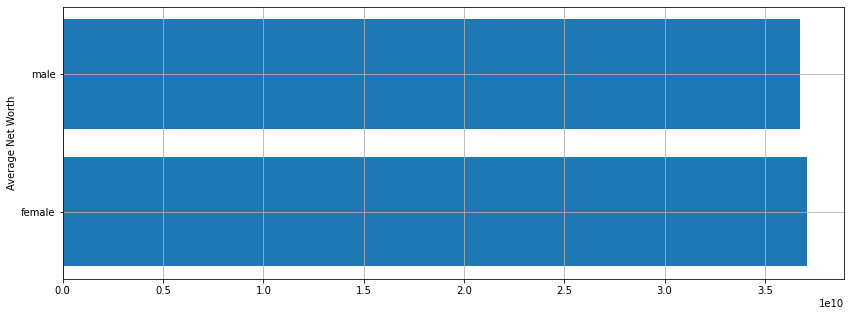

In [78]:
#visualizing how gender impacts net worth
fig, ax = plt.subplots(figsize=(14, 5))
plt.barh(worth_gender['gender'], worth_gender ['net worth'])
plt.ylabel('Average Net Worth')
ax.grid()

plt.show

In [93]:
#converting gendervariable to dummy variables
gender_dummies = pd.get_dummies(data=list['gender'])
gender_dummies.head()

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [95]:
#building a linear regression model to predict net worth using the dummy variables
regr = LinearRegression()
regr.fit(gender_dummies, list['net worth'])
female = regr.intercept_
male = regr.coef_[[0]][0]
print ((female, male))

(36918939393.93939, 164393939.39393482)


In [96]:
inds = np.arange(len(list['gender']))
size = 50
bs_female_reps =  np.empty(size)
bs_male_reps =  np.empty(size)

In [97]:
for i in range(size):
    bs_inds = np.random.choice(inds, size)
    
    bs_gender = list['gender'][bs_inds] 
    bs_worth = list['net worth'][bs_inds]
    
    bs_dummies = pd.get_dummies(bs_gender, drop_first=True)
   
    regr = LinearRegression().fit(bs_dummies, bs_worth)
    
    bs_female_reps[i] = regr.intercept_
    bs_male_reps[i] = regr.coef_[[0]][0]

In [98]:
confidence_interval_female = np.percentile(bs_female_reps, [2.5, 97.5])
confidence_interval_male = np.percentile(bs_male_reps, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_female)
print(confidence_interval_male)
print('-------------------------------------------------------------------')

[2.27791667e+10 4.87575000e+10]
[-1.33785918e+10  1.48252992e+10]
-------------------------------------------------------------------


In [99]:
#calculating the mean of net worth per industry
group = list.groupby(['career industry']).mean()
worth_industry= group.reset_index()
worth_industry

,career industry,age,self-made score,net worth
0,automative,48.000000,8.000000,2.460000e+10
1,diversified,77.333333,4.333333,3.270000e+10
2,energy,63.000000,6.000000,2.695000e+10
3,fashion & retail,70.928571,4.000000,3.750000e+10
4,finance & investments,80.250000,6.750000,3.175000e+10
5,food & beverage,68.250000,4.250000,2.310000e+10
6,gambling & casinos,86.000000,10.000000,2.680000e+10
7,manufacturing,75.500000,8.000000,1.950000e+10
8,media &entertainment,70.000000,5.000000,3.980000e+10
9,metals & mining,61.000000,8.000000,1.890000e+10


<function matplotlib.pyplot.show(close=None, block=None)>

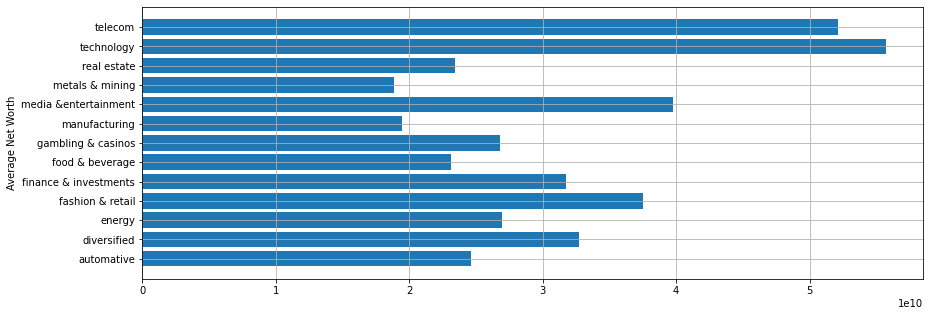

In [100]:
#visualizing how career indusrty impacts net worth
fig, ax = plt.subplots(figsize=(14, 5))
plt.barh(worth_industry['career industry'], worth_industry ['net worth'])
plt.ylabel('Average Net Worth')
ax.grid()

plt.show

In [101]:
#converting industry variable to dummy variables
#dropping the first dummy variable to avoid dependency among variables
industry_dummies = pd.get_dummies(data=list['career industry'], drop_first=True)
industry_dummies.head()

,diversified,energy,fashion & retail,finance & investments,food & beverage,gambling & casinos,manufacturing,media &entertainment,metals & mining,real estate,technology,telecom
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [103]:
#building a linear regression model to predict net worth using the dummy variables
regr = LinearRegression()
regr.fit(industry_dummies, list['net worth'])
auto = regr.intercept_
diver = regr.coef_[[0]][0]
print ((auto, diver))

(24600000000.000088, 8099999999.999908)


In [104]:
inds = np.arange(len(list['career industry']))
size = 50
bs_auto_reps =  np.empty(size)
bs_diver_reps =  np.empty(size)

In [105]:
for i in range(size):
    bs_inds = np.random.choice(inds, size)
    
    bs_industry = list['career industry'][bs_inds] 
    bs_worth = list['net worth'][bs_inds]
    
    bs_dummies = pd.get_dummies(bs_industry, drop_first=True)
   
    regr = LinearRegression().fit(bs_dummies, bs_worth)
    
    bs_auto_reps[i] = regr.intercept_
    bs_diver_reps[i] = regr.coef_[[0]][0]

In [132]:
confidence_interval_auto = np.percentile(bs_auto_reps, [2.5, 97.5])
confidence_interval_diver = np.percentile(bs_diver_reps, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_auto)
print(confidence_interval_diver)
print('-------------------------------------------------------------------')

[2.17e+10 3.82e+10]
[-1.6665625e+10  1.3600000e+10]
-------------------------------------------------------------------


In [106]:
#calculating the mean of net worth per country
group = list.groupby(['country']).mean()
worth_country= group.reset_index()
worth_country

,country,age,self-made score,net worth
0,brazil,81.000000,3.000000,1.990000e+10
1,canada,62.000000,2.000000,3.160000e+10
2,china,55.500000,7.500000,2.651667e+10
3,france,72.000000,3.200000,3.722000e+10
4,germany,73.500000,4.000000,2.655000e+10
5,hong kong,91.500000,8.500000,2.490000e+10
6,india,62.000000,4.000000,3.680000e+10
7,italy,55.000000,4.000000,2.450000e+10
8,japan,72.500000,7.500000,1.855000e+10
9,mexico,80.000000,8.000000,5.210000e+10


<function matplotlib.pyplot.show(close=None, block=None)>

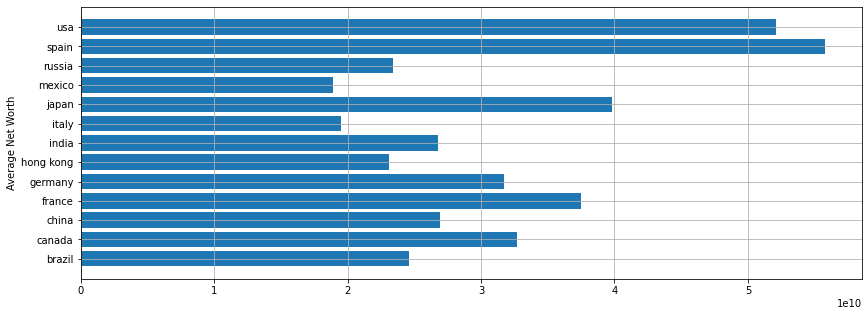

In [113]:
#visualizing how country impacts net worth
fig, ax = plt.subplots(figsize=(14, 5))
plt.barh(worth_country['country'], worth_industry ['net worth'])
plt.ylabel('Average Net Worth')
ax.grid()

plt.show

In [122]:
#converting country variable to dummy variables
#dropping the first dummy variable to avoid dependency among variables
country_dummies = pd.get_dummies(data=list['country'], drop_first=True)
country_dummies.head()

,canada,china,france,germany,hong kong,india,italy,japan,mexico,russia,spain,usa
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1


In [127]:
#building a linear regression model to predict net worth using the dummy variables
regr = LinearRegression()
regr.fit(country_dummies, list['net worth'])
brazil = regr.intercept_
canada = regr.coef_[[0]][0]
print ((brazil, canada))

(19900000000.00003, 11699999999.999977)


In [128]:
inds = np.arange(len(list['country']))
size = 50
bs_brazil_reps =  np.empty(size)
bs_canada_reps =  np.empty(size)

In [129]:
for i in range(size):
    bs_inds = np.random.choice(inds, size)
    
    bs_country = list['country'][bs_inds] 
    bs_worth = list['net worth'][bs_inds]
    
    bs_dummies = pd.get_dummies(bs_country, drop_first=True)
   
    regr = LinearRegression().fit(bs_dummies, bs_worth)
    
    bs_brazil_reps[i] = regr.intercept_
    bs_canada_reps[i] = regr.coef_[[0]][0]

In [133]:
confidence_interval_brazil = np.percentile(bs_brazil_reps, [2.5, 97.5])
confidence_interval_canada = np.percentile(bs_canada_reps, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_brazil)
print(confidence_interval_canada)
print('-------------------------------------------------------------------')

[1.99e+10 3.16e+10]
[-1.12864205e+10  1.98517857e+10]
-------------------------------------------------------------------


In [140]:
list.age.describe()

count    50.000000
mean     67.160000
std      14.752876
min      33.000000
25%      56.250000
50%      69.500000
75%      80.000000
max      92.000000
Name: age, dtype: float64

In [156]:
#creating 7 class bins for age attribute
ranges = np.linspace(30,100, 8)
pd.cut(list['age'], bins=ranges).head()

0    (50.0, 60.0]
1    (60.0, 70.0]
2    (70.0, 80.0]
3    (80.0, 90.0]
4    (70.0, 80.0]
Name: age, dtype: category
Categories (7, interval[float64]): [(30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0] < (80.0, 90.0] < (90.0, 100.0]]

In [157]:
#adding the new bin attribute to 'list' data
list['age_class_bin']= pd.cut(list['age'], bins=ranges)

In [158]:
list.head()

,name,gender,age,country,career industry,highest level of education,self-made score,net worth,age_class_bin
0,Jeff Bezos,male,56,usa,technology,Bachelor of Arts/Science,8,113000000000,"(50.0, 60.0]"
1,Bill Gates,male,64,usa,technology,Drop Out,8,98000000000,"(60.0, 70.0]"
2,Bernard Arnault & Family,male,71,france,fashion & retail,Bachelor of Arts/Science,5,76000000000,"(70.0, 80.0]"
3,Warren Buffet,male,89,usa,finance & investments,Master of Science,8,67500000000,"(80.0, 90.0]"
4,Larry Ellison,male,75,usa,technology,Drop Out,9,59000000000,"(70.0, 80.0]"


In [159]:
group = list.groupby(['highest level of education', 'age_class_bin']).mean()
worth_age= group.reset_index()
worth_age.head(10)

,highest level of education,age_class_bin,age,self-made score,net worth
0,Bachelor of Arts/Science,"(30.0, 40.0]",35.500000,2.000000,1.935000e+10
1,Bachelor of Arts/Science,"(40.0, 50.0]",48.666667,6.666667,3.290000e+10
2,Bachelor of Arts/Science,"(50.0, 60.0]",56.400000,5.800000,4.684000e+10
3,Bachelor of Arts/Science,"(60.0, 70.0]",65.333333,4.666667,3.803333e+10
4,Bachelor of Arts/Science,"(70.0, 80.0]",75.500000,5.000000,4.115000e+10
5,Bachelor of Arts/Science,"(80.0, 90.0]",83.000000,4.333333,3.323333e+10
6,Bachelor of Arts/Science,"(90.0, 100.0]",91.000000,7.000000,2.170000e+10
7,Bachelor of Science in Engineering,"(30.0, 40.0]",NaN,NaN,NaN
8,Bachelor of Science in Engineering,"(40.0, 50.0]",NaN,NaN,NaN
9,Bachelor of Science in Engineering,"(50.0, 60.0]",NaN,NaN,NaN


In [164]:
#visualizing how age impacts netw worth
sns.histplot(worth_age['highest level of education']('Bachelor of Arts/Science'))

TypeError: 'Series' object is not callable

In [61]:
by_education=list.groupby('highest level of education')['self-made score'].mean().to_frame(name = 'Average Score').reset_index()

In [62]:
by_education

,highest level of education,Average Score
0,Bachelor of Arts/Science,5.038462
1,Bachelor of Science in Engineering,4.000000
2,Doctor of Jurisprudence,4.000000
3,Doctorate,8.500000
4,Drop Out,7.090909
5,Master of Arts,2.000000
6,Master of Business Administration,8.250000
7,Master of Science,7.500000


<function matplotlib.pyplot.show(close=None, block=None)>

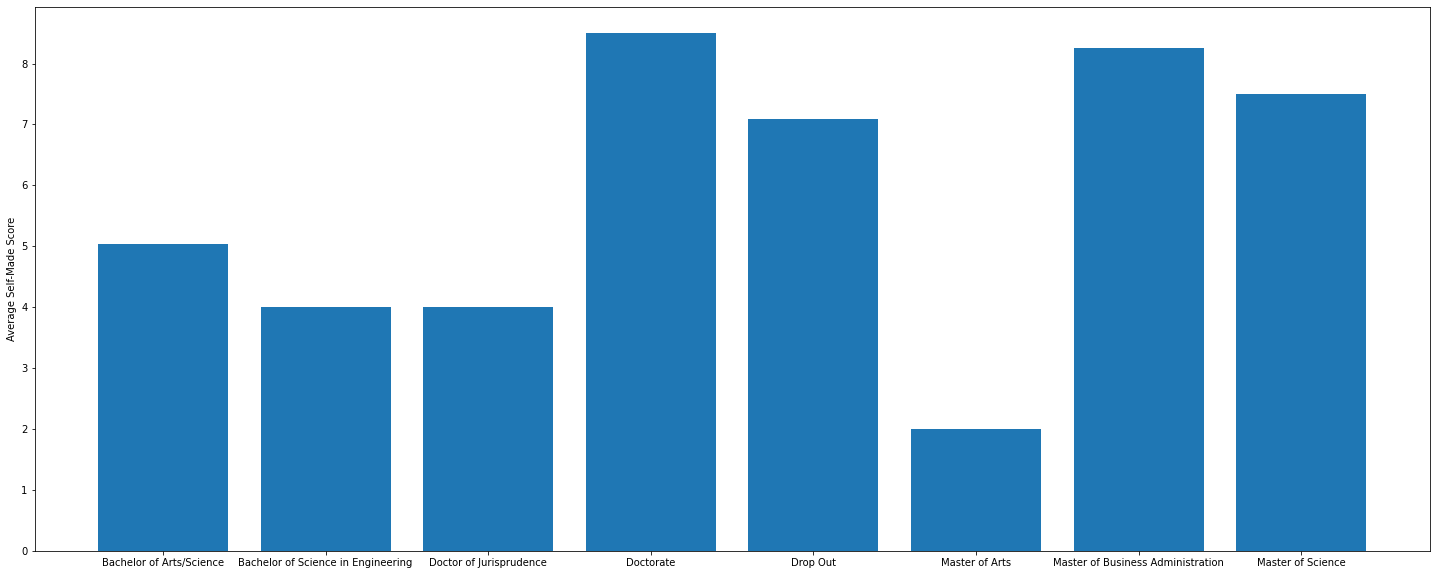

In [63]:
#ploting highest level of education against mean of self made score
fig, ax = plt.subplots(figsize=(25, 10))
plt.bar(by_education['highest level of education'], by_education['Average Score'])
plt.ylabel('Average Self-Made Score')
plt.show

In [64]:
by_education_worth=list.groupby('highest level of education')['net worth'].mean().to_frame(name = 'Avg.Net Worth').reset_index()

In [65]:
by_education_worth

,highest level of education,Avg.Net Worth
0,Bachelor of Arts/Science,3.723462e+10
1,Bachelor of Science in Engineering,3.680000e+10
2,Doctor of Jurisprudence,5.410000e+10
3,Doctorate,1.985000e+10
4,Drop Out,3.542727e+10
5,Master of Arts,3.160000e+10
6,Master of Business Administration,2.850000e+10
7,Master of Science,5.142500e+10


<function matplotlib.pyplot.show(close=None, block=None)>

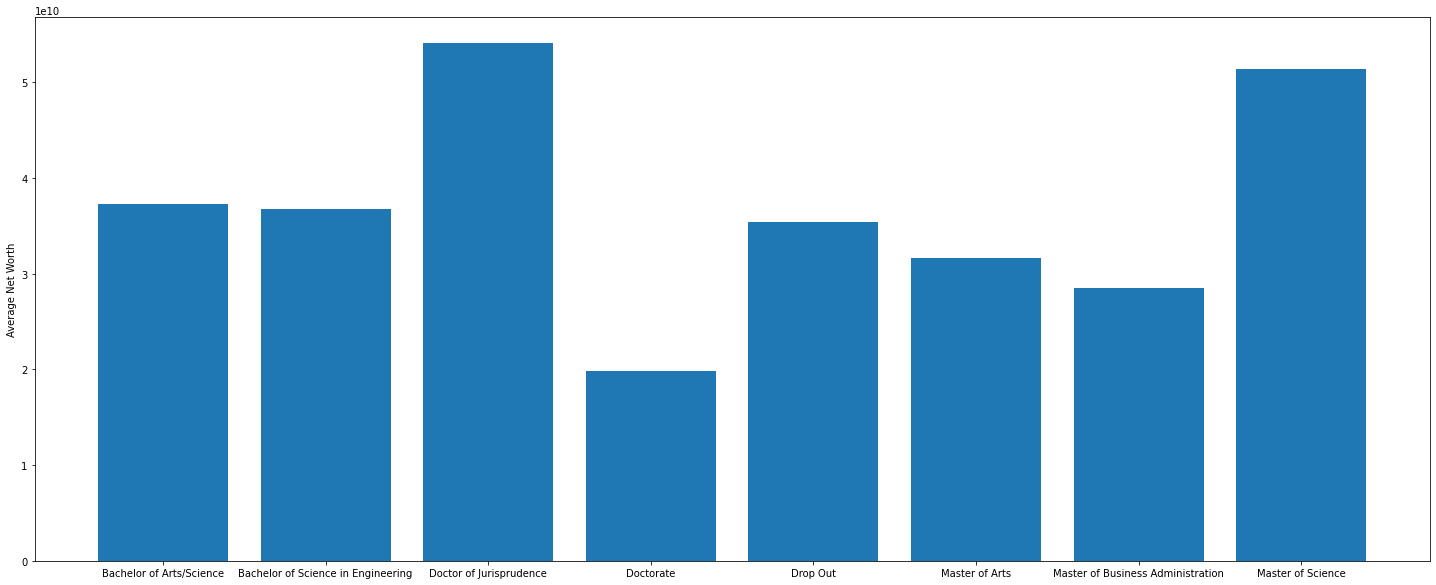

In [66]:
#ploting highest level of education against mean of net worth
fig, ax = plt.subplots(figsize=(25, 10))
plt.bar(by_education_worth['highest level of education'], by_education_worth['Avg.Net Worth'])
plt.ylabel('Average Net Worth')
plt.show

In [67]:
fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data)
ax.set_xlabel("Year of birth")
ax.set_ylabel("Percentage left-handed")

NameError: name 'lefthanded_data' is not defined